In [462]:
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [463]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

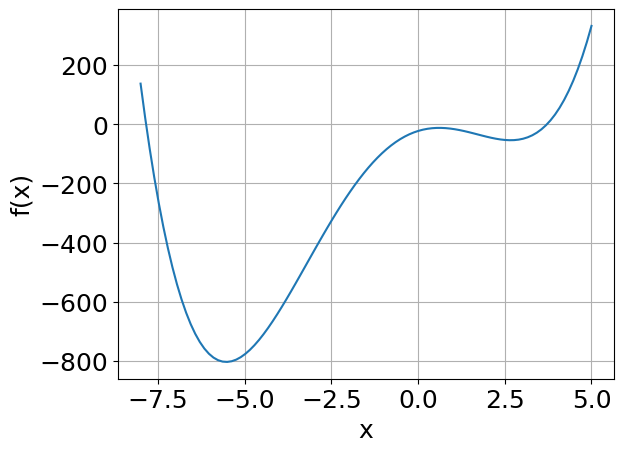

In [464]:
x = np.linspace(-8, 5, 100)

plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.plot(x,f(x))

ax.set(xlabel='x', ylabel='f(x)')
#ax.set_xticks(np.arange(min(x), max(x)+0.01,1.))

ax.grid()

plt.show()

In [372]:
#sp.optimize.minimize_scalar?

In [474]:
sp.optimize.minimize_scalar(f, method='Golden')

     fun: -803.3955308825886
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.4901161193847656e-08 )'
    nfev: 44
     nit: 37
 success: True
       x: -5.5288011239904655

In [373]:
sp.optimize.minimize_scalar(f, method='Brent')

     fun: -803.3955308825884
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663

In [374]:
sp.optimize.minimize_scalar(f, bounds=(0, 6), method='bounded')

     fun: -54.21003937712762
 message: 'Solution found.'
    nfev: 12
     nit: 12
  status: 0
 success: True
       x: 2.668865104039653

#### sp.optimiza.bracket

Given a function and distinct initial points, search in the downhill direction (as defined by the initial points) and return three points that bracket the minimum of the function.

xa= 0
xa= -3
xa= -7.854102


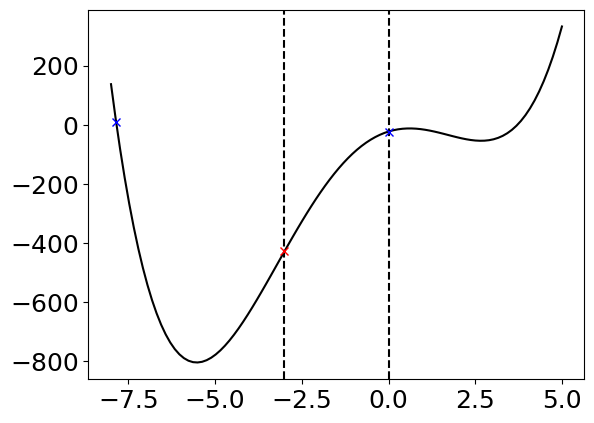

In [512]:
x = np.linspace(-8, 5, 100)
y = f(x)
init_xa=-3
init_xb=0

xa, xb, xc, fa, fb, fc, funcalls = sp.optimize.bracket(f, xa=init_xa, xb=init_xb)
print('xa=',xa)
print('xa=',xb)
print('xa=',xc)

plt.axvline(x=init_xa, color="k", linestyle="--")
plt.axvline(x=init_xb, color="k", linestyle="--")
plt.plot(x, y, "-k")
plt.plot(xa, fa, "bx")
plt.plot(xb, fb, "rx")
plt.plot(xc, fc, "bx")
plt.show()

In [376]:
## Local vs Gobal minima

In [501]:
#The sinc function is equal to  for any argument . 
#sinc(0) takes the limit value 1, making sinc not only everywhere continuous but also infinitely differentiable.

def f1(x, offset):
    return -np.sinc(x-offset)

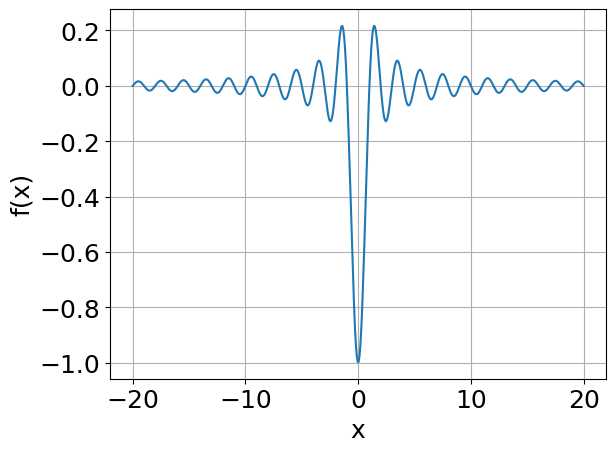

In [502]:
x = np.linspace(-20, 20, 500)

plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.plot(x,f1(x, 0))

ax.set(xlabel='x', ylabel='f(x)')

ax.grid()

plt.show()

In [503]:
offset = 5
sol = sp.optimize.minimize_scalar(f1, args=(offset,))
sol.x

-1.4843871263953001

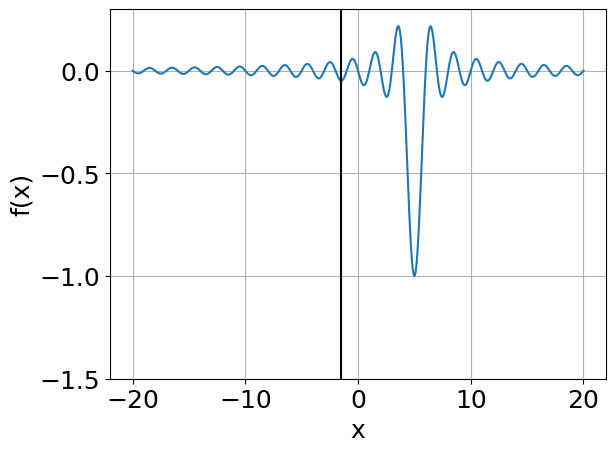

In [504]:
x = np.linspace(-20, 20, 500)

plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.plot(x,f1(x, offset))

ymin = -1.5
ymax = 0.3
ax.set_ylim(ymin, ymax)
ax.vlines(sol.x, ymin=ymin, ymax=ymax, color='k')

ax.set(xlabel='x', ylabel='f(x)')

ax.grid()

plt.show()

In [381]:
#We not necessary converge to a global minima in above example

In [478]:
# We try multiple random starts to find a global minimum and use bracket function

lower = np.random.uniform(-20, 20, 100)
upper = lower + 1
sols = [sp.optimize.minimize_scalar(f1, args=(offset,), bracket=(l, u)) for (l, u) in zip(lower, upper)]

In [477]:
# lower = np.random.uniform(-20, 20, 11)
# upper = lower + 1

# for (l, u) in zip(lower, upper):
#     print(l,u)

In [484]:
#sols

In [482]:
idx = np.argmin([sol.fun for sol in sols])
idx

4

In [485]:
#converges to the global minima

sols[idx]

     fun: -1.0
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 13
     nit: 9
 success: True
       x: 4.9999999999241975

In [505]:
### Using basin hopping method to find the global minima

In [506]:
x0 = 10
offset = 5
basinsol = sp.optimize.basinhopping(f1, x0, stepsize=1, minimizer_kwargs={'args':(offset,)})
basinsol

                        fun: -0.9999999999999973
 lowest_optimization_result:       fun: -0.9999999999999973
 hess_inv: array([[0.30399541]])
      jac: array([1.56462193e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([5.00000004])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1276
                        nit: 100
                       njev: 638
                    success: True
                          x: array([5.00000004])

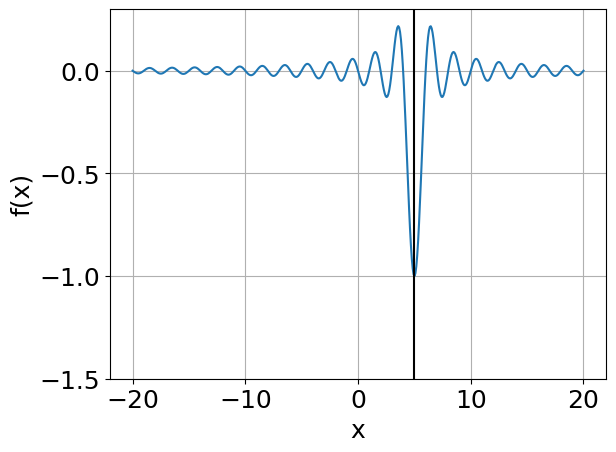

In [507]:
x = np.linspace(-20, 20, 500)

plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.plot(x,f1(x, offset))

ymin = -1.5
ymax = 0.3
ax.set_ylim(ymin, ymax)
ax.vlines(basinsol.x, ymin=ymin, ymax=ymax, color='k')

ax.set(xlabel='x', ylabel='f(x)')

ax.grid()

plt.show()

#### Minimize a multivariate function

#### The Rosenbrock function

$f(x,y) = b(y-x^2)^2 + (x-1)^2$

In [389]:
### Example: Rosenbrock function
from sympy import symbols, hessian, Function, N

x, y = symbols('x y')
f = symbols('f', cls=Function)

b = 10
f = b*(y - x**2)**2 + (1 - x)**2

#H = hessian(f, [x, y]).subs([(x,1), (y,1)])
#print(np.array(H))
#print(N(H.condition_number()))

In [390]:
f

(1 - x)**2 + 10*(-x**2 + y)**2

In [391]:
def rosenfun(x,y,b):
    return (b*(y-x**2)**2 + (1-x)**2)

In [392]:
## Create of coordinate grid

xaxis = np.linspace(-5,5,11)
yaxis = np.linspace(-5,5,11)

##Create a mesh of coordinates from the axis

x,y = np.meshgrid(xaxis, yaxis)
#x

In [393]:
## Alternately for defining xaxis and yaxis

## range of input values ()

#r_min, r_max = -5.0, 5.01
#xaxix = np.arange(r_min, r_max, 1)
#yaxis = np.arange(r_min, r_max, 1)
#x,y = np.meshgrid(xaxis, yaxis)
#x

In [394]:
b=10;
results = rosenfun(x,y,b)
print(results.shape)

(11, 11)


In [395]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

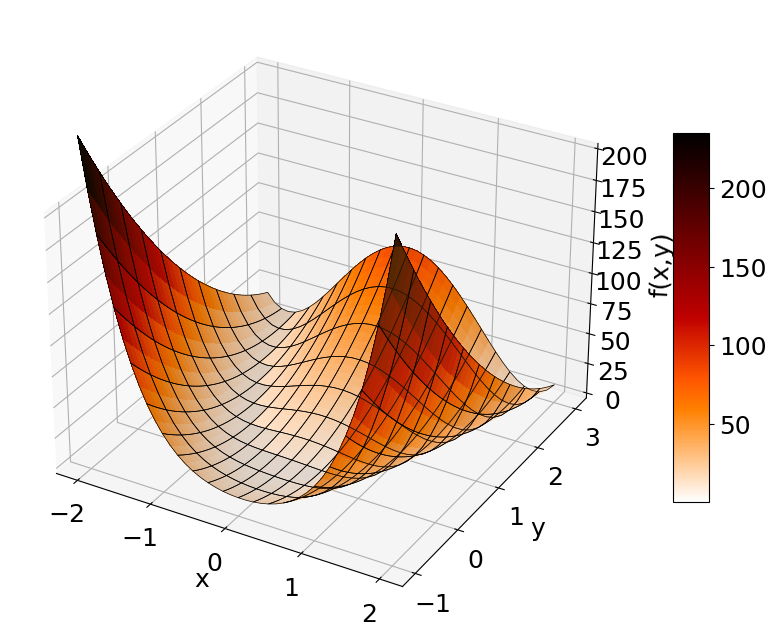

In [396]:
plt.rc("font", size=18)

#Initialize figure in 3D
fig = plt.figure(figsize=(12,8))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

b=10

#set-up the mesh
xaxis = np.linspace(-2,2,41)
yaxis = np.linspace(-1,3,41)
X,Y = np.meshgrid(xaxis, yaxis)

#Evaluate function
results = rosenfun(X,Y,b)

#plot-surface
surf = ax.plot_surface(X,Y, results, cmap=cm.gist_heat_r,lw=0, antialiased=False, alpha=1)
surf2 = ax.plot_surface(X, Y, results, edgecolor='k',lw=0.5, rstride=4, cstride=2,alpha=0.2)


#ymin = -1.5
#ymax = 0.3
#ax.set_ylim(ymin, ymax)
ax.set_zlim(0,200)

ax.set_xlabel('x',labelpad=5)
ax.set_ylabel('y',labelpad=5)
ax.set_zlabel('f(x,y)', labelpad=10)

fig.colorbar(surf, shrink=0.6, aspect=10)
#fig.colorbar(surf2, shrink=0.6, aspect=10)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.

#zlevels=np.arange(0,220,6)

#CSX = ax.contour(X, Y, results, zdir='y', offset=3.4, cmap='coolwarm')
#CSY = ax.contour(X, Y, results, zdir='x', offset=-2.4, cmap='coolwarm')
#CSZ = ax.contour(X, Y, results, zlevels, zdir='z', offset=-2, cmap='coolwarm')


plt.show()

#### The Gradient of Rosenbrock function

$J_{F} = \nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}\\
\end{bmatrix}$

$J_{F} = \nabla f = \begin{bmatrix} 2(x-1)-4b(y-x^2)x\\
2b(y-x^2)\\
\end{bmatrix}$


The gradient (or Jacobian) at a point indicates the direction of steepest ascent. Since we are looking for a minimum, one obvious possibility is to take a step in the opposite direction to the graident.

Gradient descent is also known as a first order method because it requires calculation of the first derivative at each iteration.

In [397]:
def f(x,y,b):
    return (x-1)**2 + b*(y-x**2)**2

In [398]:
def df(x,y,b):
    np.array([2*(x-1) - 4*b*(y - x**2)*x, 2*b*(y-x**2)])

#### Python Lambda function

$\textbf{lambda}$ argument(s) : expression

lambda = keyword for defining anonymous function

argument(s) = is a placeholder, that is a variable that will be used to hold the value you want to pass into the function expression. 

expression = the code you want to execute in the lambda function

In [399]:
b = 10;
f = lambda x,y: (x-1)**2 + b*(y-x**2)**2;
df = lambda x,y: np.array([2*(x-1) - 4*b*(y - x**2)*x, 2*b*(y-x**2)])

In [400]:
#### Optimization

In [401]:
F = lambda X: f(X[0],X[1])
dF = lambda X: df(X[0],X[1])

In [402]:
x0 = np.array([-1.4,1.1])
x0
#print function value at (x,y)
#print(F(x0))

#print derivate value at (x,y)
#print(dF(x0))

array([-1.4,  1.1])

In [403]:
## Gradient descent

fx = F(x0)
gx = dF(x0)

#descent direction --> negative of the slope
s = -gx

#print descent direction
print(s)

[52.96 17.2 ]


In [404]:
# Evaluate function
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

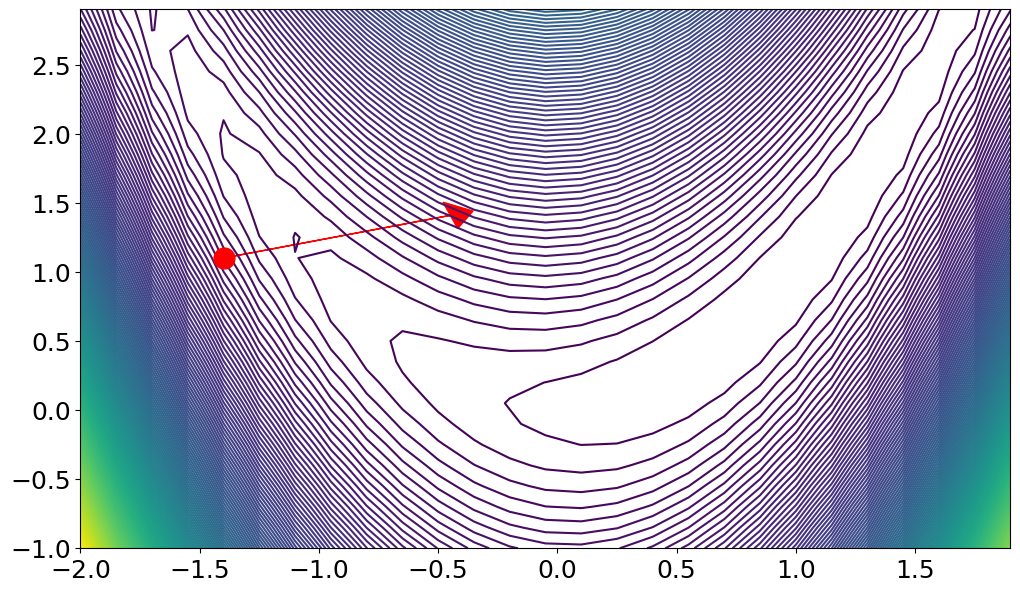

In [405]:
# Initialize figure 
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)

#Initial position
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')

#normalization factor
ns = 1.0*(np.sqrt(s[0]**2+s[1]**2))

#plot.arrow(x,y,dx,dy)
plt.arrow(x0[0],x0[1],s[0]/ns,s[1]/ns, head_width=0.2, head_length=0.1, fc='r', ec='r')

#### How far should we go along this direction?

Iterative step:

$x_{n+1} = x_{n} + \alpha*s$

Find $\alpha$ that minimizes $f(x_{0}+\alpha s)$

We weight the size of the step by a factor $\alpha$ known in the machine learning literature as the learning rate. If $\alpha$ is small, the algorithm will eventually converge towards a local minimum, but it may take long time. If $\alpha$ is large, the algorithm may converge faster, but it may also overshoot and never find the minimum. Some algorithms also determine the appropriate value of $\alpha$ at each stage by using a line search

In [406]:
# var = np.linspace(0, 0.1, 101)
# zval = [F(x0+alpha*s) for alpha in var]
# #print(zval)

# fig = plt.figure(figsize=(9,6))
# plt.plot(var,zval)

# plt.ylabel('$f(x_0+ \\alpha s)$')
# plt.xlabel('$\\alpha$')

# plt.show()

In [407]:
# fig2 = plt.figure(figsize=(9,6))
# plt.plot(var,zval)

# plt.yscale('log')
# plt.ylabel('$f(x_0+ \\alpha s)$')
# plt.xlabel('$\\alpha$')

# alpha = 0.053

# plt.vlines(x=alpha, ymin=0.1, ymax=100, color='k')

# plt.show()

In [408]:
x = np.linspace(-1, 1, 3)
#print(x)

y = np.linspace(-1, 1, 3)
#print(y)

X, Y = np.meshgrid(x, y)
#print(Y)

#Return a continuous flatten array
#print(X.ravel())

arr = np.vstack([X.ravel(), Y.ravel()])
#print(arr)

#print(arr[1:])
#print(arr[:1])

In [409]:
def rosen(x):
    """Generalized n-dimensional version of the Rosenbrock function"""
    return sum(10*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

In [410]:
x = np.linspace(-2, 2, 41)
y = np.linspace(-1, 3, 41)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((41,41))

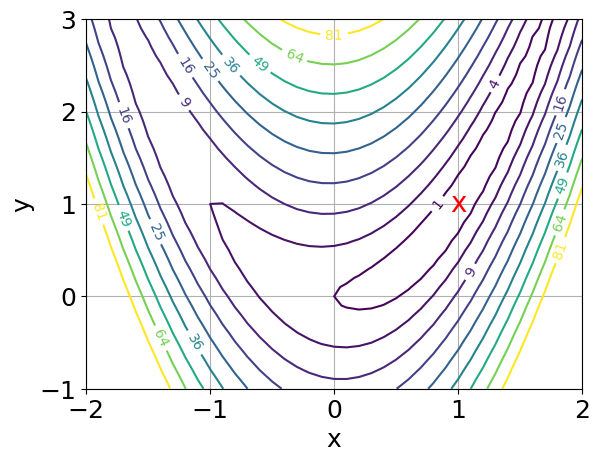

In [411]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

#CS1 = ax.contour(X, Y, Z, np.arange(10)**3)
CS1 = ax.contour(X, Y, Z, np.arange(10)**2)

#Note that the minimum of the fuction is at:
ax.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)

#ymin = -1.5
#ymax = 0.3
#ax.set_ylim(ymin, ymax)
#ax.vlines(sol.x, ymin=ymin, ymax=ymax, color='k')

ax.set(xlabel='x', ylabel='y')
ax.clabel(CS1, inline=True, fontsize=10)

ax.grid()

plt.show()

In [412]:
def rosen_der(x):
    """Derivative of generalized Rosen function."""
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 20*(xm-xm_m1**2) - 40*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -40*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 20*(x[-1]-x[-2]**2)
    return der

In [413]:
#alpha1=0.0002
#alpha1=0.01

def custmin(fun, x0, args=(), maxfev=None, alpha=alpha1,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    besty = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are gradient descent
        step = alpha * rosen_der(bestx)
        bestx = bestx - step

        besty = fun(bestx)
        funcalls += 1

        if np.linalg.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return sp.optimize.OptimizeResult(fun=besty, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

In [414]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

In [415]:
x0 = np.array([-1.6,0.1])

In [416]:
ps = [x0]
sp.optimize.minimize(rosen, x0, method=custmin, callback=reporter)

     fun: 1.2526477667359673e-16
    nfev: 4331
     nit: 4330
 success: True
       x: array([0.99999999, 0.99999998])

In [417]:
psarray = np.array(ps)

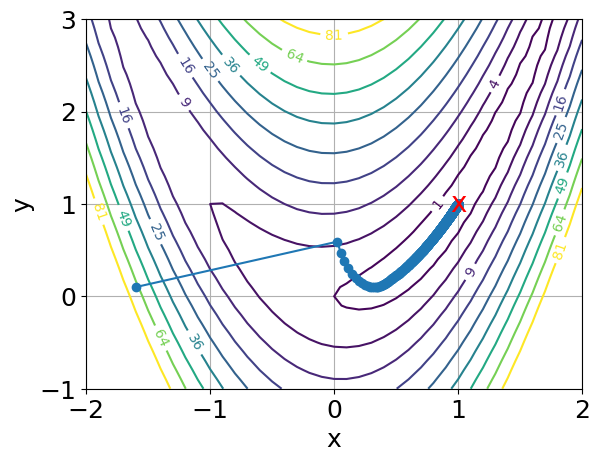

In [418]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

CS1 = ax.contour(X, Y, Z, np.arange(10)**2)

ax.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)


ax.set(xlabel='x', ylabel='y')
ax.clabel(CS1, inline=True, fontsize=10)
ax.plot(psarray[:,0], psarray[:,1], '-o')

ax.grid()

plt.show()

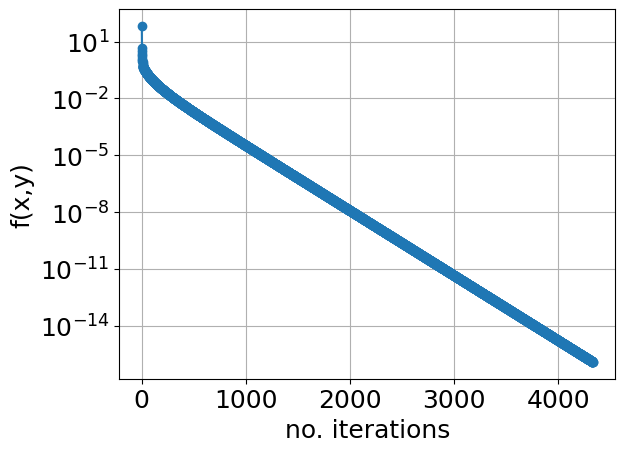

In [419]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set(xlabel='no. iterations', ylabel='f(x,y)')


ax.plot(range(len(psarray)), rosen(psarray.T), marker='o')

ax.grid()

plt.show()


Becasue gradient descent is unreliable in practice, it is not part of the scipy optimize suite of functions

#### Newton’s method 



Recall the iterative scheme:

$x^{(n+1)} = x^{(n)} - \frac{f(x^{(n)})}{f^{\prime}(x^{(n)})}$


$x^{(n+1)} = x^{(n)} + \Delta x^{(n)}$

For a multiple variable Function F, we use Jacobian:

$\Delta x^{(n)} = -J_{F}(x^{(n)})^{-1}F(x^{(n)})$ 

or in form $Ax=b$

$J_{F}(x^{(n)}).\Delta x^{(n)} = -F(x^{(n)})$

#### Newton's method for optimization


Recall the iterative scheme:

$x^{(n+1)} = x^{(n)} - \frac{f^{\prime}(x^{(n)})}{f^{\prime \prime}(x^{(n)})}$

For a multiple variable Function F, we use Jacobian:

$\Delta x^{(n)} = -H_{F}(x^{(n)})^{-1}J_F(x^{(n)})$ 


#### The Hessian of $F$ at point $(x_{1}, ..., x_{n})$ is given as:

$H_F(x) = \begin{bmatrix} \frac{\partial^{2} f_{1}(x)}{\partial x_{1}^{2}} & ... & \frac{\partial^{2} f_{1}(x)}{\partial x_{1}\partial x_{n}}\\
\vdots & \ddots & \vdots\\
\frac{\partial^{2} f_{1}(x)}{\partial x_{n}\partial x_{1}} & ... & \frac{\partial^{2} f_{1}(x)}{\partial x_{n}^{2}}\end{bmatrix}$

Hessian matrix of a vector valued function $F(x)$ is simply the first partial derivatives of its Jacobian matrix

Newton's method is also known as a second order method because it requires calculation of Hessian. For efficiency reasons, the Hessian is not directly inverted, but solved for using a variety of methods such as conjugate gradient.

In [424]:
from scipy.optimize import rosen, rosen_der, rosen_hess

In [425]:
ps = [x0]
sp.optimize.minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

     fun: 1.3785977445874658e-13
     jac: array([ 1.22747447e-04, -6.16221853e-05])
 message: 'Optimization terminated successfully.'
    nfev: 52
    nhev: 37
     nit: 37
    njev: 52
  status: 0
 success: True
       x: array([0.99999963, 0.99999926])

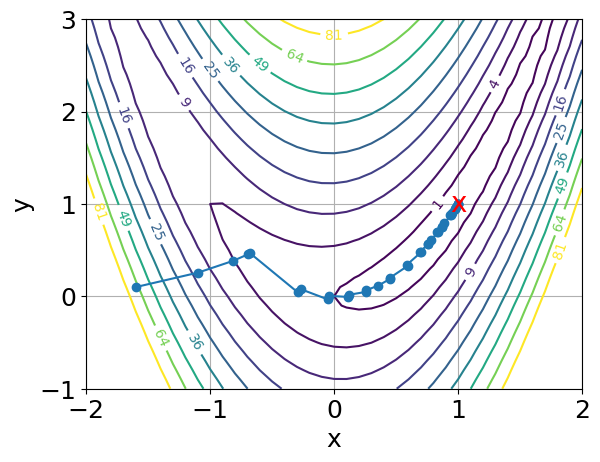

In [438]:
ps = np.array(ps)
plt.rc("font", size=18)
fig, ax = plt.subplots()

CS1 = ax.contour(X, Y, Z, np.arange(10)**2)

ax.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)


ax.set(xlabel='x', ylabel='y')
ax.clabel(CS1, inline=True, fontsize=10)
ax.plot(ps[:,0], ps[:,1], '-o')
ax.grid()

plt.show()

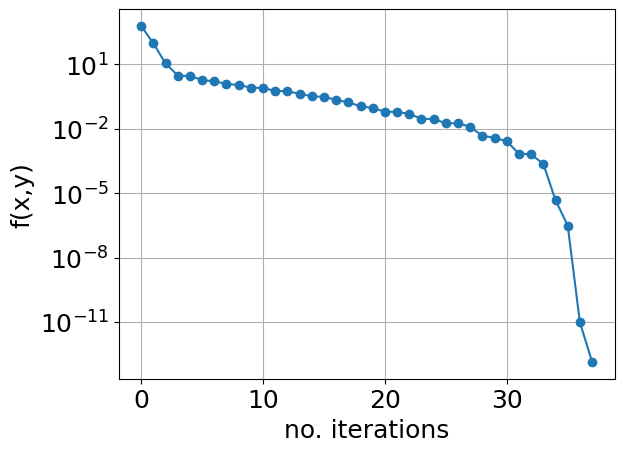

In [439]:
plt.rc("font", size=18)
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set(xlabel='no. iterations', ylabel='f(x,y)')


ax.plot(range(len(ps)), rosen(ps.T), marker='o')

ax.grid()

plt.show()

In [ ]:
#### Quasi-newton method

In [440]:
ps = [x0]
sp.optimize.minimize(rosen, x0, method='BFGS', callback=reporter)

      fun: 2.2552915221396518e-11
 hess_inv: array([[0.49928623, 0.99804297],
       [0.99804297, 2.00006373]])
      jac: array([-6.36187991e-07,  4.74147388e-08])
  message: 'Optimization terminated successfully.'
     nfev: 114
      nit: 30
     njev: 38
   status: 0
  success: True
        x: array([0.99999525, 0.9999905 ])

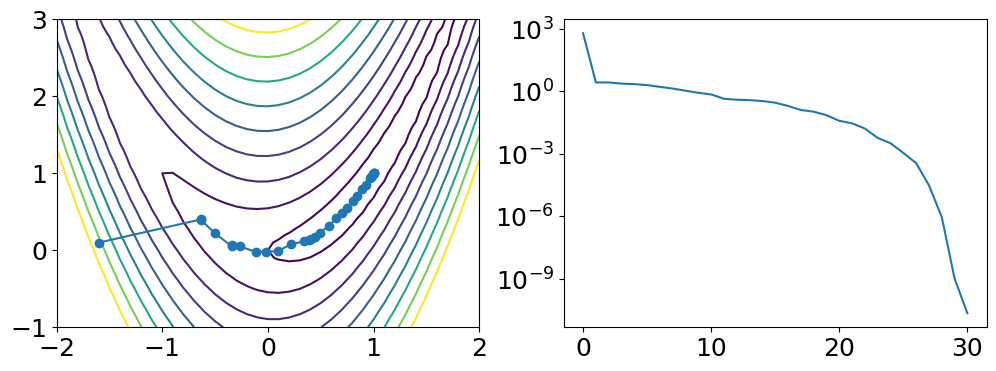

In [443]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**2)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

There are some pptimization algorithm not based on gradient or newton method. Instead, they uses heuristic search strategies that do not require any derivatives, only function evaluations. 

##### One well-known example is the Nelder-Mead simplex algorithm.

In [445]:
ps = [x0]
sp.optimize.minimize(rosen, x0, method='nelder-mead', callback=reporter)

 final_simplex: (array([[1.00000605, 1.00001005],
       [0.99997023, 0.99994011],
       [0.99999299, 0.99998986]]), array([4.60508207e-10, 8.98860972e-10, 1.55999640e-09]))
           fun: 4.6050820679555166e-10
       message: 'Optimization terminated successfully.'
          nfev: 138
           nit: 73
        status: 0
       success: True
             x: array([1.00000605, 1.00001005])

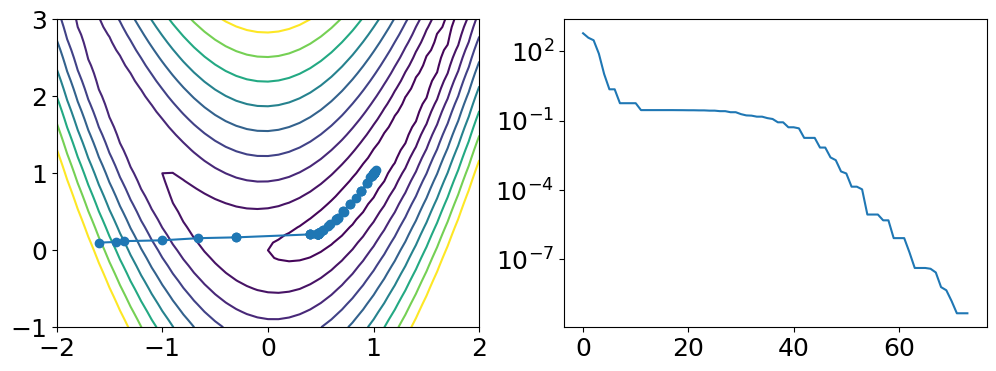

In [446]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**2)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

##### Scipy lecture notes: Mathematical optimization

https://scipy-lectures.org/advanced/mathematical_optimization/#knowing-your-problem

#### An Interactive Tutorial on Numerical Optimization

https://www.benfrederickson.com/numerical-optimization/

#### Further reading Conjugate gradient descent

https://gregorygundersen.com/blog/2022/03/20/conjugate-gradient-descent/